In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\qizheng\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
X_selected=df[["koi_fpflag_nt","koi_fpflag_ss","koi_fpflag_co","koi_fpflag_ec",
              "koi_period","koi_period_err1","koi_period_err2",
              "koi_time0bk","koi_time0bk_err1","koi_time0bk_err2",
              "koi_duration","koi_duration_err1","koi_duration_err2",
               "koi_depth","koi_depth_err1","koi_depth_err2",
              "koi_model_snr","koi_steff","koi_steff_err1","koi_steff_err2"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
y = df["koi_disposition"]
print(X_selected.shape, y.shape)

(6991, 20) (6991,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=1)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,1.8720,0.1430,-0.1430,102.9,10.4,-10.4,11.7,6047,120,-133
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,3.3900,0.1530,-0.1530,593.3,38.0,-38.0,18.0,4852,144,-144
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,1.5795,0.0152,-0.0152,47337.0,120.0,-120.0,476.0,4664,126,-140
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,10.3280,0.1650,-0.1650,584.8,19.2,-19.2,34.7,5646,101,-112
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,10.2940,0.9390,-0.9390,193.6,23.9,-23.9,8.7,6705,164,-233


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
label_encoder.inverse_transform([0,1,2])

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

# Train the Model



k: 1, Train/Test Score: 1.000/0.847
k: 3, Train/Test Score: 0.917/0.864
k: 5, Train/Test Score: 0.902/0.875
k: 7, Train/Test Score: 0.893/0.882
k: 9, Train/Test Score: 0.893/0.879
k: 11, Train/Test Score: 0.887/0.876
k: 13, Train/Test Score: 0.881/0.873
k: 15, Train/Test Score: 0.880/0.875
k: 17, Train/Test Score: 0.879/0.875
k: 19, Train/Test Score: 0.876/0.878


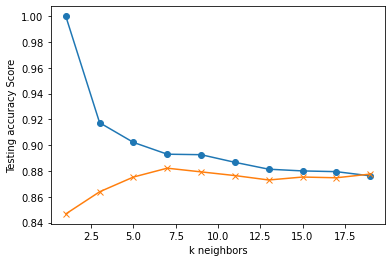

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, encoded_y_train)
    train_score = knn.score(X_train_scaled, encoded_y_train)
    test_score = knn.score(X_test_scaled, encoded_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, encoded_y_train)
predictions = knn.predict(X_test_scaled)
print(predictions)

print(f"Training Data Score: {knn.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, encoded_y_test)}")

[0 2 2 ... 2 2 0]
Training Data Score: 0.876215906923517
Testing Data Score: 0.8775743707093822


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
k_list=[x for x in range(1,20,2)]
param_grid = {'n_neighbors': k_list,
             'weights':['uniform','distance'],
             'metric':['minkowski','euclidean','manhattan']}

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

In [14]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.2s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.8701111200052395


In [16]:
predictions = grid.predict(X_test_scaled)

In [17]:
print('Test Acc: %.3f' % grid.score(X_test_scaled, encoded_y_test))

Test Acc: 0.884


# Save the Model

In [18]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_1_knn.sav'
joblib.dump(grid, filename)

['model_1_knn.sav']